<img src='./img/oean_atmos_banner.png' alt='banner' align='right' width='60%'></img>

<hr>

<br>

<img src='./img/cmsaf_logo.png' alt='banner' align='left' width='15%'></img>


# Ocean Surface Fluxes and Atmospheric Parameters

### About

The **Hamburg Ocean Atmosphere Parameters and Fluxes from Satellite data record (HOAPS)** is a completely satellite based climatology and all variables are derived from recalibrated and intercalibrated measurements from SSM/I and SSMIS passive microwave radiometers, except for the SST, which is taken from AVHRR measurements. 

HOAPS includes the following parameters:
* `precipitation`
* `evaporation`
* `freshwater budget`
* `latent heat flux`
* `total column water vapour`
* `near surface specific humidity`
* `near surface wind speed over the global ice free oceans`

All HOAPS products have global coverage, i.e., within ±180° longitude and ±80° latitude, are only defined over the ice-free ocean surface and cover the period from July 1987 until December 2014. The products are available as monthly averages and 6-hourly composites on a regular latitude/longitude grid with a spatial resolution of 0.5° x 0.5° degrees.

HOAPS data are part of **EUMETSAT's Satellite Application Facility on Climate Monitoring (CM SAF)**, which develops, produces, archives, disseminates and promotes satellite-observation-based products to support climate monitoring. Find more information about CM SAF [here](https://www.cmsaf.eu/EN/Overview/Overview_node.html).

### How to access data

HOAPS data and CM SAF products in general are available via the [CM SAF Web User Interface](https://wui.cmsaf.eu/safira/action/viewProduktHome). The interface allows you to search and order CM SAF data products. The data provision is free of charge, but a user registration is mandatory to get access.

[>> Register for the CM SAF Web User Interface](https://wui.cmsaf.eu/safira/action/viewLogin)

#### Search for HOAPS products
The [CM SAF Product navigator](https://wui.cmsaf.eu/safira/action/viewProduktSearch) allows you to find and order data products. The product navigator allows you search for products in two ways: (i) search according to product groups / types or (ii) via advanced search.

You can enter the following keywords in the advanced search to find HOAPS Evaporation data:
* `Product group: Climate Data Records`
* `Product family: HOAPS 4.0`
* `Product name: EVA - Evaporation`

The search above results in two products:
* [HOAPS 4.0 Evaporation - Monthly Mean climate record](https://wui.cmsaf.eu/safira/action/viewProduktDetails?eid=21866&fid=23)
* [HOAPS 4.0 Evaporation - Instantaneous 6 hourly composite](https://wui.cmsaf.eu/safira/action/viewProduktDetails?eid=21867&fid=23)

The following example is based on the HOAP4.0 Evaporation monthly mean climate record.


### Module outline
* [1. Load, browse and visualize monthly aggregated global evaporation](#load_browse)
* [2. Animate global monthly evaporation from Jan 1987 to Dec 2014](#animate)
* [3. Visualize time-series of global monthly evaporation from 1987 to 2014](#timeseries)

### Further resources

* [CM SAF: Ocean Surface Fluxes and Atmospheric Parameters - Overview](https://www.cmsaf.eu/EN/Overview/OurProducts/Hoaps/Hoaps_node.html)
* [Product User Manual SSM/I and SSMIS data record products - HOAPS version 4.0](https://www.cmsaf.eu/SharedDocs/Literatur/document/2017/saf_cm_dwd_pum_hoaps4_1_1_pdf.pdf?__blob=publicationFile&v=3)
* [Variability of Evaporation and Precipitation over the Ocean from Satellite Data](https://link.springer.com/article/10.1134/S0001433817090195)
* [The GEWEX Water Vapor Assessment: Results from Intercomparison, Trend, and Homogeneity Analysis of Total Column Water Vapor](https://journals.ametsoc.org/view/journals/apme/55/7/jamc-d-15-0304.1.xml)

<hr>

#### Load required libraries

In [1]:
import tarfile
import xarray as xr
from matplotlib import animation
from IPython.display import HTML
from datetime import datetime

#### Load helper functions

In [2]:
%run ../../functions.ipynb

<hr>

### <a id='load_browse'></a> 1. Load, browse and visualize monthly aggregated global evaporation

The monthly HOAPS 4.0 data files are disseminated in individual netCDF files compressed in a tar archived. The first step is to untar the downloaded archive. You can do this with the Python library `tarfile`.

A total of 330 files are extracted, which resemble a netCDF file for each month, from July 1987 to December 2014.

In [3]:
my_tar = tarfile.open('./data/ORD44977.tar')
my_tar.extractall('./data/') # specify which folder to extract to
my_tar.close()

<br>

Then, we can open all netCDF files at once with the xarray function `open_mfdataset()`. We have to specify the keyword arguments `concat_dim` and `combine` to provide the function guidance on how the netCDF files shall be concatenated. We choose `time` as concatenation dimension. The result is an xarray.Dataset with four dimensions (`time`, `lat`, `lon`, `nv`) and nine data variables. 

In [3]:
hoaps_ds = xr.open_mfdataset('./data/*.nc', concat_dim='time', combine='nested')
hoaps_ds

<xarray.Dataset>
Dimensions:    (time: 330, lat: 320, lon: 720, nv: 2)
Coordinates:
  * time       (time) datetime64[ns] 1987-07-01 1987-08-01 ... 2014-12-01
  * lat        (lat) float64 79.75 79.25 78.75 78.25 ... -78.75 -79.25 -79.75
  * lon        (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    evap       (time, lat, lon) float32 dask.array<chunksize=(1, 320, 720), meta=np.ndarray>
    numo       (time, lat, lon) float64 dask.array<chunksize=(1, 320, 720), meta=np.ndarray>
    numd       (time, lat, lon) timedelta64[ns] dask.array<chunksize=(1, 320, 720), meta=np.ndarray>
    stdv       (time, lat, lon) float32 dask.array<chunksize=(1, 320, 720), meta=np.ndarray>
    evap_smp   (time, lat, lon) float32 dask.array<chunksize=(1, 320, 720), meta=np.ndarray>
    evap_sys   (time, lat, lon) float32 dask.array<chunksize=(1, 320, 720), meta=np.ndarray>
    evap_ran   (time, lat, lon) float32 dask.array<chunksize=(1, 320, 720), meta=np.ndarray>
    satm       (time, lat, lon) float32 dask.array<chunksize=(1, 320, 720), meta=np.ndarray>
Attributes: (12/45)
    title:                       Hamburg Ocean Atmosphere Parameters and Flux...
    summary:                     This dataset contains gridded Thematic Clima...
    Conventions:                 CF-1.6,ACDD-1.3
    netcdf_library_version:      4.3.2 of Jan  5 2015 14:37:57 $
    institution:                 EUMETSAT/CMSAF
    project:                     Satellite Application Facility on Climate Mo...
    ...                          ...
    filename:                    EVAmm19870701000000213SCPOS01GL.nc
    time_coverage_start:         1987-07-01T00:00:00 UTC
    time_coverage_end:           1987-07-31T23:59:59 UTC
    time_coverage_duration:      P1M
    date_modified:               2017-09-20T12:08:21 UTC
    history:                     2017-09-20T12:08:21 UTC: hoaps-sc.split.bash...

<br>

Let us now load the data variable `evap` as xarray.DataArray and call the variable `eva_da`. You see that the resulting data array only has three dimensions (`time`, `lat`, `lon`) and provides additional attribute information, such as `long_name` or `units`.

In [4]:
eva_da = hoaps_ds['evap']
eva_da

<xarray.DataArray 'evap' (time: 330, lat: 320, lon: 720)>
dask.array<concatenate, shape=(330, 320, 720), dtype=float32, chunksize=(1, 320, 720), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1987-07-01 1987-08-01 ... 2014-12-01
  * lat      (lat) float64 79.75 79.25 78.75 78.25 ... -78.75 -79.25 -79.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Attributes:
    long_name:       Evaporation
    standard_name:   lwe_water_evaporation_rate
    units:           mm/d
    C_format:        %6.2f
    FORTRAN_format:  F6.2
    comment:         parameterization: C.W.Fairall et al., J.Geophys.Res.; 19...
    cell_methods:    area: time: mean
    code:            67

<br>

The next step is to visualize the dataset. You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh), which makes use of matploblib's function `pcolormesh` and the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Evaporation - 1995-11'}>)

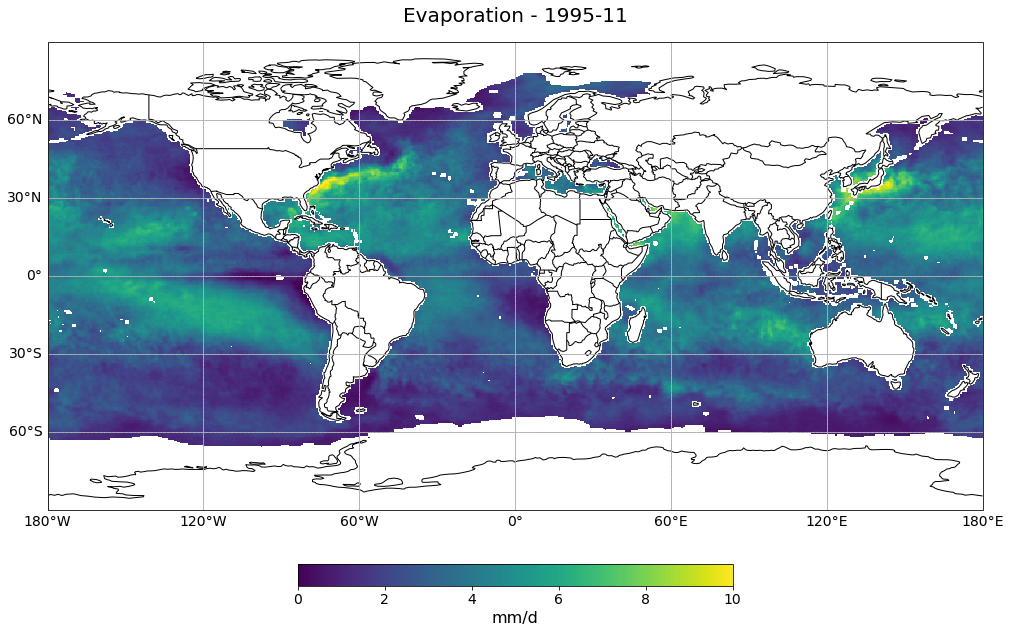

In [5]:
month = 100
visualize_pcolormesh(data_array = eva_da[month,:,:],
                    longitude=eva_da.lon,
                    latitude=eva_da.lat,
                    projection=ccrs.PlateCarree(),
                    color_scale='viridis',
                    unit=eva_da.units,
                    long_name=eva_da.long_name + ' - ' + str(eva_da.time[month].data.astype('datetime64[M]')),
                    vmin=0,
                    vmax=10)

<br>

### <a id='animate'></a> 2. Animate global monthly evaporation from July 1987 to December 2014

Now, we can also animate the forecast. The animation function consists of 4 parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function

In [7]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=eva_da[0,:,:],
                               longitude=eva_da.lon, 
                               latitude=eva_da.lat,
                               projection=ccrs.PlateCarree(), 
                               color_scale='viridis', 
                               unit=eva_da.units,
                               long_name= eva_da.long_name + ' '+ str(eva_da.time[0].data.astype('datetime64[M]')),
                               vmin=0,
                               vmax=10)

frames = 35

def draw(i):
    img = plt.pcolormesh(eva_da.lon, 
                         eva_da.lat, 
                         eva_da[i,:,:], 
                         cmap='viridis', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=10,
                         shading='auto')
    
    ax.set_title(eva_da.long_name + ' '+ str(eva_da.time[i].data.astype('datetime64[M]')), fontsize=20, pad=20.0)
    return img


def init():
    return fig


def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=400, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)

##### Play the animation video as HTML5 video

In [8]:
HTML(ani.to_html5_video())

<br>

### <a id='timeseries'></a> 3. Visualize time-series of global monthly evaporation from 1987 to 2014

Let us compute the global average evaporation for each month from July 1987 to December 2014. We can apply the xarray function `mean()` and compute the average the two dimensions `lat` and `lon`. The result is a data array with one remaining dimension, `time`, which has 330 entries.

In [ ]:
eva_global_monthly = eva_da.mean(['lat', 'lon'])
eva_global_monthly

<br>

The last step is to visualize the data array with monthly averaged values of global evaporation as line plot. You can use the generic `plot()` function from matplotlib to visualize a simple line plot.

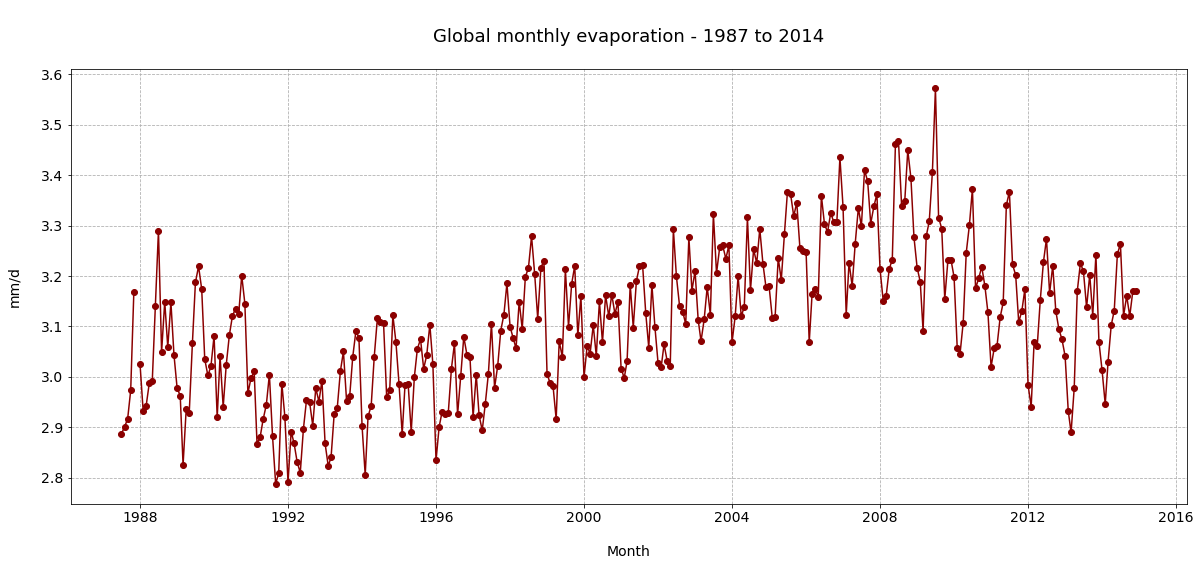

In [16]:
# Initiate a figure
fig = plt.figure(figsize=(20,8))
ax = plt.subplot()

# Define the plotting function
ax.plot(eva_global_monthly.time.data.astype('datetime64[M]'),eva_global_monthly, 'o-', color='darkred')

# Customize the title and axes lables
ax.set_title('\nGlobal monthly evaporation - 1987 to 2014\n', fontsize=18)
ax.set_ylabel(eva_da.units+'\n', fontsize=14)
ax.set_xlabel('\nMonth', fontsize=14)

# Customize the fontsize of the axes tickes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a gridline to the plot
ax.grid(linestyle='--')


<hr>

<img src='../../img/copernicus_logo.png' alt='Logo EU Copernicus' align='left' width='20%'><br><br><br><br>



<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.